原图：

![box_plots_02](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/box_plots_02.png)


> [ChatGPT 对话](https://chatgpt.com/share/681f8f4e-2778-8005-aee8-1bcf143dd926)，还没有搞定，很多细节都没有做好。

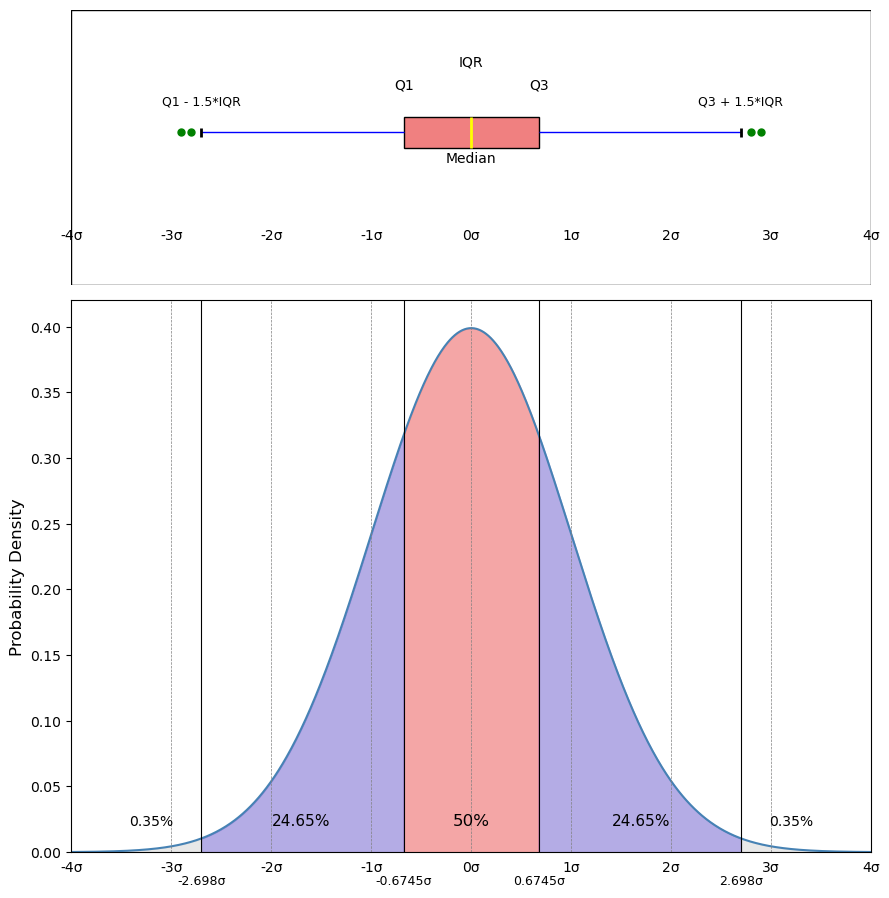

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.patches import Rectangle

# 设置参数
mu = 0
sigma = 1
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, mu, sigma)

# 分位数
Q1 = norm.ppf(0.25)
Q3 = norm.ppf(0.75)
IQR = Q3 - Q1
median = norm.ppf(0.5)
lw = Q1 - 1.5 * IQR
uw = Q3 + 1.5 * IQR

# 创建图像
fig, axs = plt.subplots(2, 1, figsize=(9, 9), gridspec_kw={'height_ratios': [1, 2]})
plt.subplots_adjust(hspace=0.25)

# ====================== 上图：箱线图 ======================
ax1 = axs[0]
ax1.set_xlim(-4, 4)
ax1.set_ylim(-0.5, 1.3)
ax1.axis('off')

# 外框
ax1.add_patch(Rectangle((-4, -0.5), 8, 1.8, edgecolor='black', facecolor='none', lw=1))

# 画箱体
ax1.add_patch(Rectangle((Q1, 0.4), IQR, 0.2, facecolor='lightcoral', edgecolor='black'))

# 中位数
ax1.vlines(median, 0.4, 0.6, color='yellow', lw=2)

# 胡须线
ax1.hlines(0.5, lw, Q1, color='blue', lw=1)
ax1.hlines(0.5, Q3, uw, color='blue', lw=1)
ax1.vlines(lw, 0.47, 0.53, color='black', lw=2)
ax1.vlines(uw, 0.47, 0.53, color='black', lw=2)

# 异常值
ax1.plot([lw - 0.2, lw - 0.1], [0.5, 0.5], 'go', markersize=5)
ax1.plot([uw + 0.1, uw + 0.2], [0.5, 0.5], 'go', markersize=5)

# 注释文字
ax1.text(median, 0.30, 'Median', ha='center', fontsize=10)
ax1.text(Q1, 0.78, 'Q1', ha='center', fontsize=10)
ax1.text(Q3, 0.78, 'Q3', ha='center', fontsize=10)
ax1.text((Q1 + Q3) / 2, 0.93, 'IQR', ha='center', fontsize=10)
ax1.text(lw, 0.68, 'Q1 - 1.5*IQR', ha='center', fontsize=9)
ax1.text(uw, 0.68, 'Q3 + 1.5*IQR', ha='center', fontsize=9)

# x轴标注
for s in [-4, -3, -2, -1, 0, 1, 2, 3, 4]:
    ax1.text(s, -0.2, f'{s}σ', ha='center', fontsize=10)

# ====================== 下图：正态分布 ======================
ax2 = axs[1]
ax2.plot(x, y, color='steelblue', lw=1.5)
ax2.set_xlim(-4, 4)
ax2.set_ylim(0, 0.42)
ax2.set_ylabel('Probability Density', fontsize=12)

# 阴影填色
fill_main = np.linspace(-0.6745, 0.6745, 300)
fill_middle1 = np.linspace(-2.698, -0.6745, 300)
fill_middle2 = np.linspace(0.6745, 2.698, 300)
fill_tail1 = np.linspace(-4, -2.698, 100)
fill_tail2 = np.linspace(2.698, 4, 100)

ax2.fill_between(fill_main, norm.pdf(fill_main), color='lightcoral', alpha=0.7)
ax2.fill_between(fill_middle1, norm.pdf(fill_middle1), color='slateblue', alpha=0.5)
ax2.fill_between(fill_middle2, norm.pdf(fill_middle2), color='slateblue', alpha=0.5)
ax2.fill_between(fill_tail1, norm.pdf(fill_tail1), color='lightgray', alpha=0.5)
ax2.fill_between(fill_tail2, norm.pdf(fill_tail2), color='lightgray', alpha=0.5)

# 标注百分比
ax2.text(0, 0.02, '50%', ha='center', fontsize=12)
ax2.text(-1.7, 0.02, '24.65%', ha='center', fontsize=11)
ax2.text(1.7, 0.02, '24.65%', ha='center', fontsize=11)
ax2.text(-3.2, 0.02, '0.35%', ha='center', fontsize=10)
ax2.text(3.2, 0.02, '0.35%', ha='center', fontsize=10)

# 主刻度线与标注
ax2.set_xticks([])
for s in [-4, -3, -2, -1, 0, 1, 2, 3, 4]:
    ax2.axvline(x=s, color='gray', linestyle='--', lw=0.5)
    ax2.text(s, -0.015, f'{s}σ', ha='center', fontsize=10)

# 精确分位线 ±0.6745σ 和 ±2.698σ
for val in [-2.698, -0.6745, 0.6745, 2.698]:
    ax2.axvline(x=val, color='black', lw=0.8)
    ax2.text(val, -0.025, f'{val:.4g}σ', ha='center', fontsize=9)

plt.tight_layout()
plt.show()
